In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("data0.csv", usecols=["place1", "place2", "num", "date"])
data["date"] = pd.to_datetime(data["date"])  # 将日期转换为时间戳

# 提取 DC14->DC10、DC20->DC35、DC25->DC62 这三条线路的数据
routes = [("DC19", "DC8"), ("DC20", "DC35"), ("DC25", "DC62")]
route_data = {}
for route in routes:
    route_data[route] = data.loc[(data["place1"] == route[0]) & (data["place2"] == route[1]), ["date", "num"]]
    route_data[route].set_index("date", inplace=True)
    route_data[route].sort_index(inplace=True)

# 计算每条线路的最大值
max_values = {}
for route in routes:
    max_value = route_data[route]["num"].max()
    max_values[route] = max_value
    print(f"Line {route[0]}->{route[1]} max value: {max_value}")

# 对每条线路进行预测
predictions = {}


Line DC19->DC8 max value: 67105
Line DC20->DC35 max value: 13082
Line DC25->DC62 max value: 30541


d:\Applications\Development\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Applications\Development\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


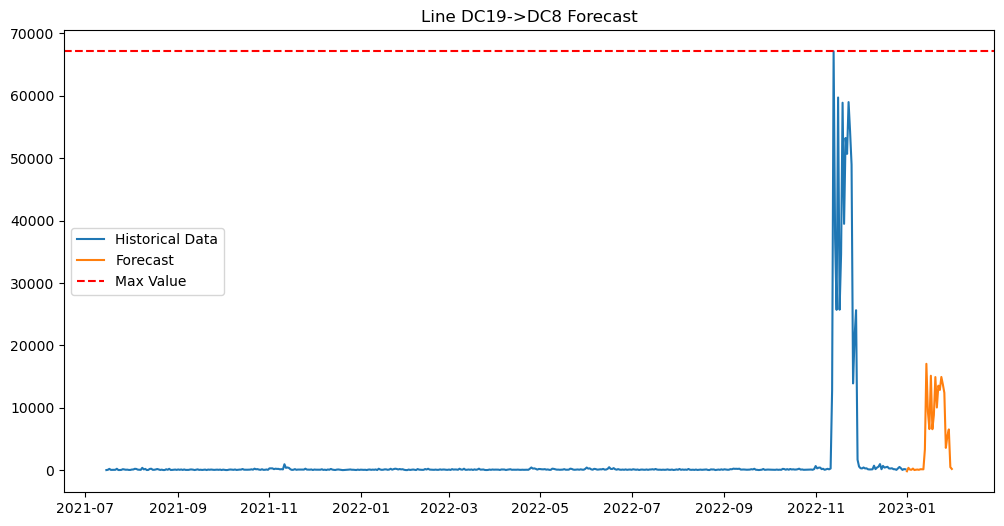

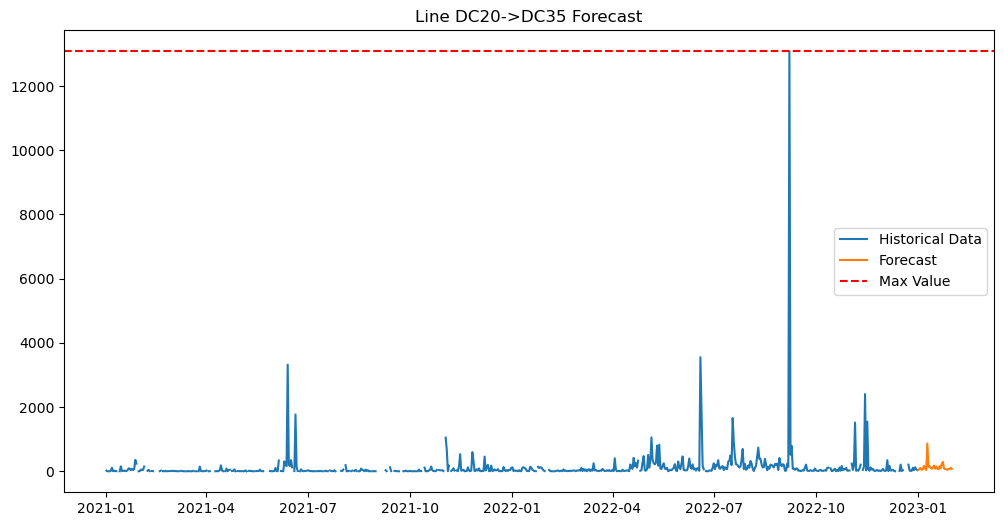

d:\Applications\Development\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Applications\Development\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Applications\Development\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


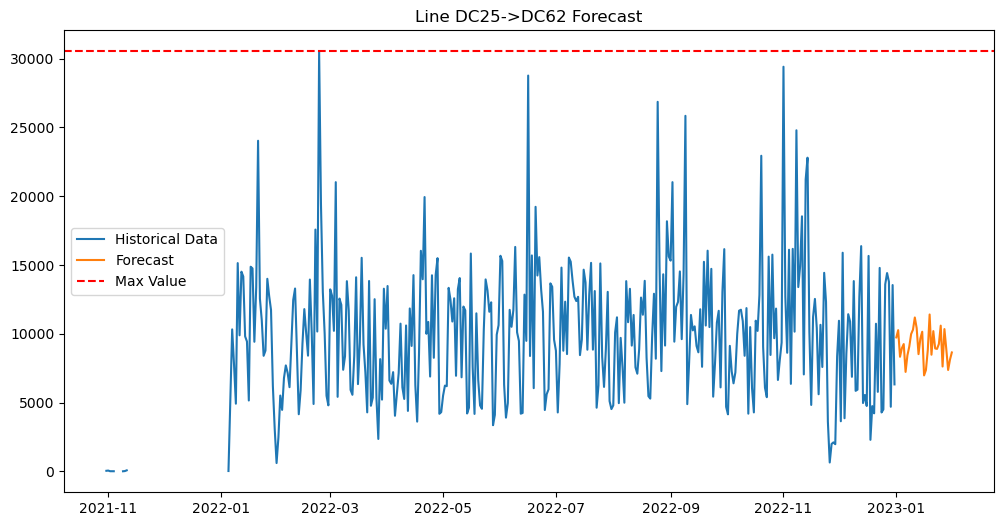

In [4]:
for route in routes:
    # 重新生成时间索引
    start_date = pd.to_datetime("2021-01-01")
    end_date = pd.to_datetime("2022-12-31")
    date_range = pd.date_range(start=start_date, end=end_date)
    route_data[route] = route_data[route].reindex(date_range, fill_value=np.nan)

    # 训练模型并预测
    model = SARIMAX(route_data[route], order=(3, 0, 2), seasonal_order=(0, 1, 2, 31))
    results = model.fit()
    forecast = results.forecast(steps=31)

    # 处理超过最大值的情况
    for i in range(len(forecast)):
        if forecast[i] > max_values[route]:
            excess = forecast[i] - max_values[route]
            forecast[i] = max_values[route]
            if i < len(forecast) - 1:
                forecast[i+1] += excess

    # 存储预测结果
    predictions[route] = forecast

    # 可视化预测结果和历史数据
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(route_data[route], label="Historical Data")
    ax.plot(forecast, label="Forecast")
    ax.axhline(max_values[route], color="r", linestyle="--", label="Max Value")
    ax.set_title(f"Line {route[0]}->{route[1]} Forecast")
    ax.legend()
    plt.show()


In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 读取数据
# data = pd.read_excel("data0.xlsx", usecols=["place1", "place2", "num", "date"])
data["date"] = pd.to_datetime(data["date"])  # 将日期转换为时间戳

# 提取 DC14->DC10、DC20->DC35、DC25->DC62 这三条线路的数据
routes = [("DC25", "DC62")]
route_data = {}
for route in routes:
    route_data[route] = data.loc[(data["place1"] == route[0]) & (data["place2"] == route[1]), ["date", "num"]]
    route_data[route].set_index("date", inplace=True)
    route_data[route].sort_index(inplace=True)

# 计算每条线路的最大值
max_values = {}
for route in routes:
    max_value = route_data[route]["num"].max()
    max_values[route] = max_value
    print(f"Line {route[0]}->{route[1]} max value: {max_value}")

# 对每条线路进行预测
predictions = {}
for route in routes:
    # 重新生成时间索引
    start_date = pd.to_datetime("2021-01-01")
    end_date = pd.to_datetime("2022-12-31")
    date_range = pd.date_range(start=start_date, end=end_date)
    route_data[route] = route_data[route].reindex(date_range, fill_value=np.nan)

    # 训练模型并预测
    model = SARIMAX(route_data[route], order=(10, 0, 10), seasonal_order=(10, 0, 10, 31))
    results = model.fit()
    forecast = results.forecast(steps=31)
    fitted_values = results.fittedvalues  # 获取拟合值

    # 处理超过最大值的情况
    for i in range(len(forecast)):
        if forecast[i] > max_values[route]:
            excess = forecast[i] - max_values[route]
            forecast[i] = max_values[route]
            if i < len(forecast) - 1:
                forecast[i+1] += excess

    # 存储预测结果
    predictions[route] = forecast

    # 可视化预测结果和历史数据
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(route_data[route], label="Historical Data")
    ax.plot(fitted_values, label="Fitted Data", linestyle="--")  # 绘制拟合数据
    ax.plot(forecast, label="Forecast")
    ax.axhline(max_values[route], color="r", linestyle="--", label="Max Value")
    ax.set_title(f"Line {route[0]}->{route[1]} Forecast")
    ax.legend()
    plt.show()




Line DC25->DC62 max value: 30541


d:\Applications\Development\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Applications\Development\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Applications\Development\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
